# Error Analysis

This notebook contains code that can analyze and visualize the output of the `error_analysis.py` script.

In [77]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

## Utility functions

In [7]:
def mean_loss(data):
    """The mean loss of the sample."""
    return data['loss'].mean()

def mean_ppl(data):
    """The mean perplexity of the sample."""
    return np.exp(mean_loss(data))

## Grouping functions

In [33]:
df = pd.DataFrame({'Animal' : ['Falcon', 'Falcon',
...                                'Parrot', 'Parrot'],
...                    'Max Speed' : [380., 370., 24., 26.],
                       'Info': ['a', 'b', 'c', 'd']})

In [39]:
df.groupby(['Animal'])['Info'].max()

Animal
Falcon    b
Parrot    d
Name: Info, dtype: object

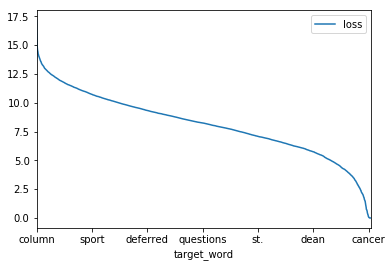

In [102]:
loss_series = data.groupby('target_word')['loss'].mean().sort_values(ascending=False)
# loss_series.plot(title='loss')
loss_frame = loss_series.to_frame().reset_index(level=0)
loss_frame.plot(x='target_word')

In [122]:
from sklearn.linear_model import LinearRegression
xy = loss_frame.loc[:, 'loss']
lr = LinearRegression()
lr.fit(loss_frame.index.to_numpy().reshape(-1, 1), xy.to_numpy().reshape(-1, 1))
lr.predict(loss_frame.index.to_numpy().reshape(-1, 1))

array([[12.66297088],
       [12.66145911],
       [12.65994734],
       ...,
       [ 3.52280821],
       [ 3.52129644],
       [ 3.51978467]])

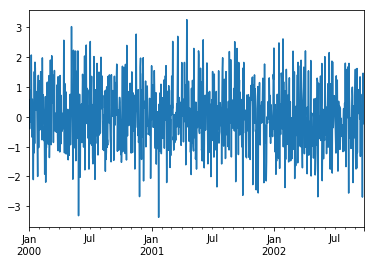

In [59]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

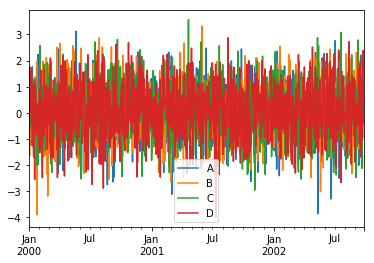

In [62]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
plt.figure()
df.plot()

In [3]:
data = pd.read_csv('medium_zaremba.tsv', sep='\t')
data

,target_word,context,loss,perplexity,entropy,target_index,target_p,predicted_p,most_probable
0,it,no,7.962794,2872.087235,5.187257,259,0.000348,0.170874,one <unk> longer more doubt
1,was,no it,3.298505,27.072131,4.969223,3,0.036938,0.164552,has is <unk> was will
2,n't,no it was,3.649473,38.454403,5.766292,5,0.026005,0.091156,<unk> a in the <eos>
3,black,no it was n't,12.004586,163502.934928,5.729271,2777,0.000006,0.058559,a <unk> the going able
4,monday,no it was n't black,10.000809,22044.286151,2.301167,164,0.000045,0.471322,<eos> to and or but
5,<eos>,no it was n't black monday,0.283108,1.327248,1.530590,0,0.753439,0.753439,<eos> but and or to
6,but,no it was n't black monday <eos>,2.627568,13.840073,4.737958,1,0.072254,0.192487,the but in mr. <unk>
7,while,no it was n't black monday <eos> but,4.586890,98.188610,4.489631,19,0.010184,0.236934,the mr. it he in
8,the,no it was n't black monday <eos> but while,1.132430,3.103188,4.520462,0,0.322249,0.322249,the mr. a some <unk>
9,new,no it was n't black monday <eos> but while the,3.602739,36.698627,6.485606,2,0.027249,0.100976,<unk> company new government two


In [8]:
mean_loss(data), mean_ppl(data)

(4.419713347768816, 83.0724690364067)